In [1]:
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import Altair for high level plotting
import altair as alt
import altair_catplot as altcat

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.plotting

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

# Pevent bulky altair plots
alt.data_transformers.enable('json')

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

Loading BokehJS ...

In [165]:
# Load the data into DataFrame df
df = pd.read_csv('../data/130315_1A_aanat2.csv', comment='#')

In [166]:
df.head()
df.shape[0]

514848

In [4]:
dataframes = []
for i in range(1, 97):
    dataframes.append(df[df['location'] == i])


(to do multiple, sort by the location to make sure you are always considering the right fish)

array = [1, 2, 3, 4, .... ]

active_minutes_count = 0

for activity seconds in each one minute entry:

    if activity > 1:
    
        count +=1
        
    else:
    
        count = 0
        
        add this particular entry to the bucket
        

In [61]:
# Get the activity level of each individual fish (in this cell I'm only cosidering 
# the first fish location but that can be easily changed)

activity_array = []

for i, d in enumerate(dataframes):
    
    temp_array = [0] * d.shape[0]
    active_minutes_count = 0
    
    for index, row in d.iterrows():
        if row['activity'] > 1: # our fishy is still active
            active_minutes_count += 1
        else: # we have entered a period of inactivity
            temp_array[active_minutes_count] += 1
            active_minutes_count = 0
    activity_array.append(temp_array)

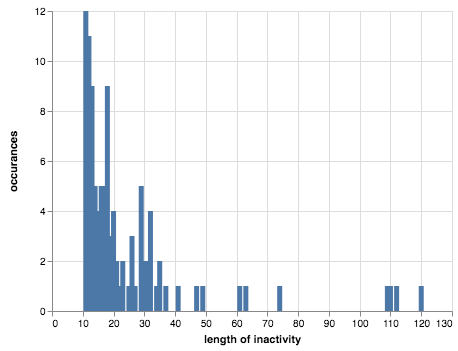

In [93]:
alt.renderers.enable('default')
x = range(11, 121) #range(1, len(activity_array[0]) + 1)
x = pd.Series(x)
x.index = x

y = activity_array[0][10:120]
y = pd.Series(y)
y.index = x

new_df = pd.DataFrame({"length of inactivity" : x, "occurances" : y})

alt.Chart(new_df).mark_bar().encode(
#     x = 'length of inactivity',
#     y = 'occurances',
    alt.X('length of inactivity:Q', scale=alt.Scale(rangeStep=10)),
    alt.Y('occurances:Q')
).interactive()

In [99]:
# Get the activity level of all the fish together!

total_activity_array = [0] * 7000

for i, d in enumerate(dataframes):
    active_minutes_count = 0
    
    for index, row in d.iterrows():
        if row['activity'] > 1: # our fishy is still active
            active_minutes_count += 1
        else: # we have entered a period of inactivity
            total_activity_array[active_minutes_count] += 1
            active_minutes_count = 0

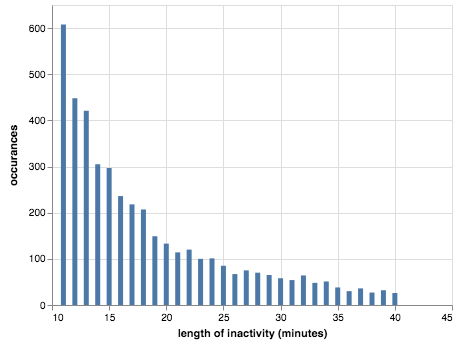

In [100]:
x = range(11, 41) #range(1, len(total_activity_array[0]) + 1)
x = pd.Series(x)
x.index = x

y = total_activity_array[10:40]
y = pd.Series(y)
y.index = x

new_df2 = pd.DataFrame({"length of inactivity (minutes)" : x, "occurances" : y})

alt.Chart(new_df2).mark_bar().encode(
#     x = 'length of inactivity',
#     y = 'occurances',
    alt.X('length of inactivity (minutes):Q', scale=alt.Scale(rangeStep=10)),
    alt.Y('occurances:Q')
).interactive()

**Next steps:**
    
Length of sleep - done

Number of times they fell asleep/woke up - can be easily added


Acorrding to the Averites, he likes it if you use legit methods to test and prove the significance of your hypothesis (like Student t test), so we should do that!


In [62]:
# Load the data into DataFrame df_p
df_p = pd.read_csv('../data/130315_1A_aanat2_resampled.csv', comment='#')

In [83]:
sum = 0
for a in activity_array[4][15:]:
    sum += a

In [84]:
sum

36

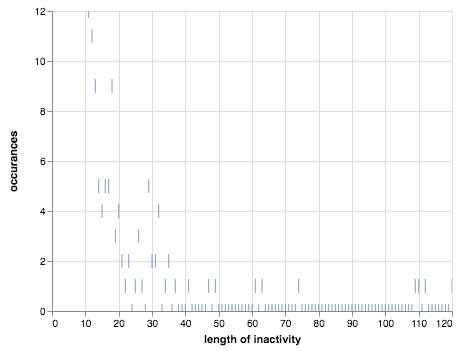

In [101]:
alt.Chart(new_df).mark_tick().encode(
    alt.X('length of inactivity:Q', scale=alt.Scale(rangeStep=10)),
    alt.Y('occurances:Q')
).interactive()

In [102]:
new_df.head()

,length of inactivity,occurances
11,11,12
12,12,11
13,13,9
14,14,5
15,15,4


In [164]:
# Get the activity level of all the fish together!
for i, d in enumerate(dataframes):
    data = []
    inactive_minutes_count = 0
    counter = 0
    print ('made it to ' + str(i))
    for index, row in d.iterrows():
        if row['activity'] < 1: # our fishy is still inactive
            inactive_minutes_count += 1
            
        else: # we are in a period of activity
            if inactive_minutes_count == 0:
                data.append(0)
            else: # we are coming from a period of inactivity
                data += [inactive_minutes_count] + [0] * (inactive_minutes_count - 1) + [0]
                inactive_minutes_count = 0
        
        if counter == d.shape[0] - 1: # we are at the end and are still inactive, manually add
            print ('yay')
            data += [inactive_minutes_count] + [0] * (inactive_minutes_count - 1)
            
        counter += 1
    print ('total iterations: ' + str(counter))
    
    print ('length of calculated data array: ' + str(len(data)))
    df_1 = df[df["location"] == i + 1]
    print ('length of dataframe: ' + str(df_1.shape[0]))

    df_1["InactivityBegun" + str(i)] = np.array(data[:df_1.shape[0]])
    print (df_1.head())
    

made it to 0
yay
total iterations: 5363
length of calculated data array: 5363
length of dataframe: 5363
     location  activity                 time       zeit  zeit_ind  day  \
0           1       0.6  2013-03-15 18:31:09 -14.480833      -869    4   
96          1       1.9  2013-03-15 18:32:09 -14.464167      -868    4   
192         1       1.9  2013-03-15 18:33:09 -14.447500      -867    4   
288         1      13.4  2013-03-15 18:34:09 -14.430833      -866    4   
384         1      15.4  2013-03-15 18:35:09 -14.414167      -865    4   

     InactivityBegun0  
0                   1  
96                  0  
192                 0  
288                 0  
384                 0  
made it to 1


/Users/maria/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


yay
total iterations: 5363
length of calculated data array: 5364
length of dataframe: 5363
     location  activity                 time       zeit  zeit_ind  day  \
1           2       1.4  2013-03-15 18:31:09 -14.480833      -869    4   
97          2       0.0  2013-03-15 18:32:09 -14.464167      -868    4   
193         2       0.0  2013-03-15 18:33:09 -14.447500      -867    4   
289         2       0.0  2013-03-15 18:34:09 -14.430833      -866    4   
385         2       0.0  2013-03-15 18:35:09 -14.414167      -865    4   

     InactivityBegun1  
1                   0  
97                 27  
193                 0  
289                 0  
385                 0  
made it to 2
yay
total iterations: 5363
length of calculated data array: 5363
length of dataframe: 5363
     location  activity                 time       zeit  zeit_ind  day  \
2           3       0.0  2013-03-15 18:31:09 -14.480833      -869    4   
98          3       0.0  2013-03-15 18:32:09 -14.464167      -868   

In [158]:
df_1.head()

,location,activity,time,zeit,zeit_ind,day
1,2,1.4,2013-03-15 18:31:09,-14.480833,-869,4
97,2,0.0,2013-03-15 18:32:09,-14.464167,-868,4
193,2,0.0,2013-03-15 18:33:09,-14.447500,-867,4
289,2,0.0,2013-03-15 18:34:09,-14.430833,-866,4
385,2,0.0,2013-03-15 18:35:09,-14.414167,-865,4
